# Theoretical

**1). What is K-Nearest Neighbors (KNN) and how does it work?**

Ans) KNN is a non-parametric, lazy learning algorithm used for classification and regression. It works by finding the 'K' closest data points in the training set to a new data point based on a distance metric. For classification, it assigns the class label most common among its neighbors for regression, it averages their values.

**2). What is the difference between KNN Classification and KNN Regression?**

Ans) The key difference is in the prediction output. KNN Classification predicts a categorical class label by taking a majority vote of the K nearest neighbors classes. KNN Regression predicts a continuous numerical value by averaging the values of the K nearest neighbors.

**3). What is the role of the distance metric in KNN?**

Ans) The distance metric defines closeness and is crucial for identifying the K nearest neighbors. Common metrics like Euclidean or Manhattan distance determine how similarity is quantified between data points. The choice of metric significantly impacts which neighbors are selected and thus the final prediction.

**4). What is the Curse of Dimensionality in KNN?**

Ans) The Curse of Dimensionality in KNN refers to performance degradation in high-dimensional spaces. As dimensions increase, data points become sparse, distances between points become less meaningful, and computational cost rises. This makes it harder for KNN to find truly discriminative nearest neighbors, often leading to overfitting.

**5). How can we choose the best value of K in KNN?**

Ans) The best value of K can be chosen through methods like cross-validation, where various K values are tested for optimal performance.

**6). What are KD Tree and Ball Tree in KNN?**

Ans) KD Tree and Ball Tree are data structures used to optimize KNN's neighbor search, making it more efficient than brute-force calculation. KD Trees partition data using axis-aligned splits, suitable for lower dimensions. Ball Trees create hyper-spheres to encompass data, performing better in higher dimensions or with non-uniform data.

**7). When should you use KD Tree vs. Ball Tree?**

Ans) Use KD Tree for datasets with a low-to-medium number of dimensions. It's generally faster to build and query in these scenarios. Use Ball Tree for high-dimensional data or when the data distribution is very non-uniform or complex, as its spherical partitioning is more robust.

**8). What are the disadvantages of KNN?**

Ans) KNN is computationally expensive and memory-intensive, especially with large datasets. It's highly sensitive to feature scaling and the presence of outliers. Furthermore, its performance degrades significantly in high-dimensional spaces due to the Curse of Dimensionality, and determining the optimal K value can be challenging.

**9). How does feature scaling affect KNN?**

Ans) Feature scaling is critical for KNN because it's a distance-based algorithm. Features with larger numerical ranges will disproportionately influence distance calculations, skewing neighbor selection. Scaling ensures all features contribute equally to the distance metric, leading to more accurate and unbiased neighbor identification.

**10). What is PCA (Principal Component Analysis)?**

Ans) PCA is an unsupervised linear dimensionality reduction technique. It transforms high-dimensional data into a lower-dimensional space. The goal is to retain as much of the original data's variance as possible by finding new orthogonal dimensions called Principal Components.

**11). How does PCA work?**

Ans) PCA works by standardizing data, calculating its covariance matrix, and then finding the eigenvectors and eigenvalues of this matrix. Eigenvectors represent the new principal components, and eigenvalues indicate the amount of variance along each component. Data is then projected onto the top 'k' eigenvectors.

**12). What is the geometric intuition behind PCA?**

Ans) Geometrically, PCA reorients the data's coordinate system. It finds the direction of greatest variance, then an orthogonal direction with the next greatest variance, and so on.

**13). What is the difference between Feature Selection and Feature Extraction?**

Ans) Feature Selection involves choosing a subset of the original features directly, retaining their original meaning. Feature Extraction, on the other hand, transforms the original features into new, derived features which are combinations of the originals and may not have direct interpretability. PCA is a feature extraction method.

**14). What are Eigenvalues and Eigenvectors in PCA?**

Ans) In PCA, Eigenvectors are the directions or axes along which the data varies most. They represent the principal components. Eigenvalues are scalar values corresponding to each eigenvector, quantifying the amount of variance captured along that particular principal component. Larger eigenvalues mean more variance captured.

**15). How do you decide the number of components to keep in PCA?**

Ans) The number of components can be decided using a scree plot, looking for an "elbow" where explained variance drops sharply. Alternatively, select components that cumulatively explain a high percentage of the total variance. Cross-validation with a downstream model can also guide the choice.

**16). Can PCA be used for classification?**
Ans) No, PCA itself cannot be used directly for classification. PCA is an unsupervised technique that reduces dimensionality without considering class labels. However, it is very commonly used as a preprocessing step before applying a classification algorithm. This can help reduce noise, decrease computational cost, and sometimes improve classifier performance.

**17). What are the limitations of PCA?**
Ans) PCA is a linear technique and may not perform well on data with non-linear relationships. It involves information loss during dimension reduction, and the new principal components can be difficult to interpret. Additionally, PCA is sensitive to the scaling of features and can be affected by outliers in the data.

**18). How do KNN and PCA complement each other?**

Ans) KNN and PCA complement each other by addressing KNN's weaknesses. PCA reduces high dimensionality, mitigating the "Curse of Dimensionality" for KNN. This makes distance calculations more meaningful, reduces computational load, filters noise, and can lead to improved accuracy and speed for KNN.

**19). How does KNN handle missing values in a dataset?**

Ans) Standard KNN algorithms do not inherently handle missing values. Data with NaNs must be preprocessed first. Common strategies include imputing missing values using the mean, median, or mode of the feature, or more advanced methods like K-Nearest Neighbors Imputation itself.

**20). What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**
Ans)

PCA : Aims to find dimensions that capture the maximum variance in the data, regardless of class labels. It's for dimensionality reduction.

LDA : Aims to find dimensions that best separate different classes. It maximizes the separability between known classes and minimizes within-class variance. It's primarily for dimensionality reduction for classification tasks.

# Practical

**21). Train a KNN Classifier on the Iris dataset and print model accuracy?**

In [ ]:
from sklearn.datasets import load_iris, make_regression,make_blobs,load_wine
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.neighbors import KDTree, BallTree
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 1.0


**22). Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)?**

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 108.14198878074414


**23). Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy?**

In [ ]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
iris = load_iris()
X_class, y_class = iris.data, iris.target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
knn_euclidean.fit(X_train_class, y_train_class)
knn_manhattan.fit(X_train_class, y_train_class)
print("Euclidean Accuracy:", accuracy_score(y_test_class, knn_euclidean.predict(X_test_class)))
print("Manhattan Accuracy:", accuracy_score(y_test_class, knn_manhattan.predict(X_test_class)))

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


**24). Train a KNN Classifier with different values of K and visualize decision boundaries?**

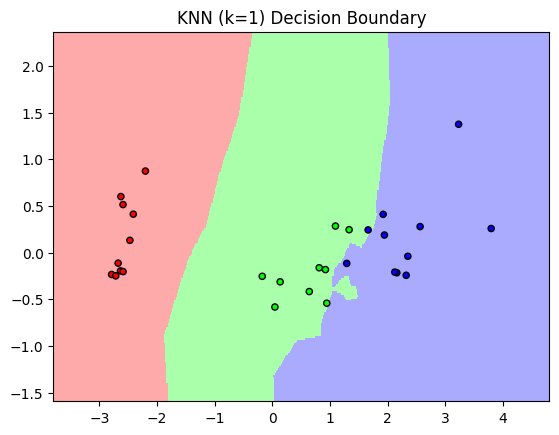

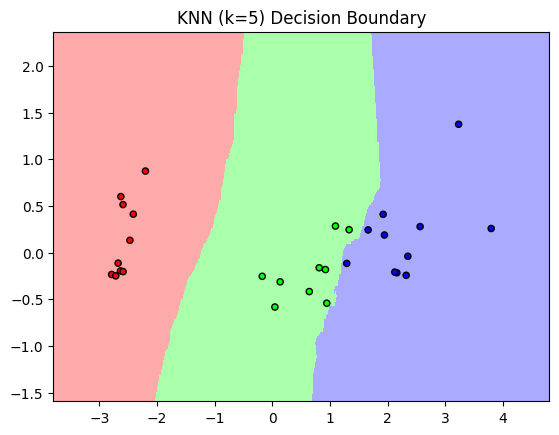

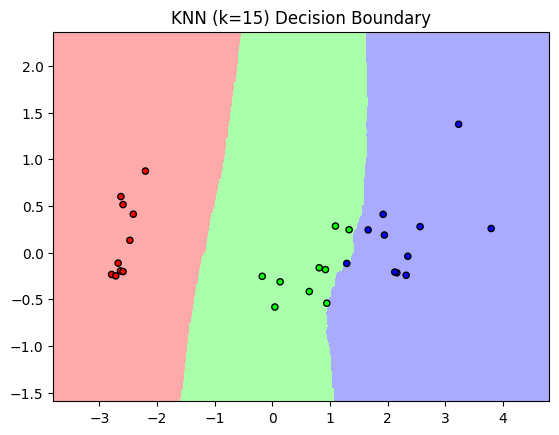

In [ ]:

iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)
def plot_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.show()
for k in [1, 5, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2d, y_train)
    plot_boundary(X_test_2d, y_test, knn, f'KNN (k={k}) Decision Boundary')

**25). Apply Feature Scaling before training a KNN model and compare results with unscaled data?**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_class)
X_test_scaled = scaler.transform(X_test_class)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train_class)
print("Accuracy with Scaling:", accuracy_score(y_test_class, knn_scaled.predict(X_test_scaled)))

Accuracy with Scaling: 1.0


**26). Train a PCA model on synthetic data and print the explained variance ratio for each component?**

In [ ]:
X, _ = make_regression(n_samples=100, n_features=5, random_state=42)
pca = PCA()
pca.fit(X)
print("Variance for Each Component:")
print(pca.explained_variance_ratio_)

Variance for Each Component:
[0.26256655 0.21579693 0.20219416 0.18127308 0.13816928]


**27). Apply PCA before training a KNN Classifier and compare accuracy with and without PCA?**

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy without PCA: {accuracy_no_pca}")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = knn_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
print(f"Accuracy with PCA: {accuracy_with_pca}")

Accuracy without PCA: 1.0
Accuracy with PCA: 0.9333333333333333


**28). Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV?**

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9583333333333334


**29). Train a KNN Classifier and check the number of misclassified samples?**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
total_samples = len(y_test)
correctly_classified = accuracy_score(y_test, y_pred, normalize=False)
misclassified_samples = total_samples - correctly_classified
print(f"misclassified samples: {misclassified_samples}")

misclassified samples: 0.0


**30). Train a PCA model and visualize the cumulative explained variance?**

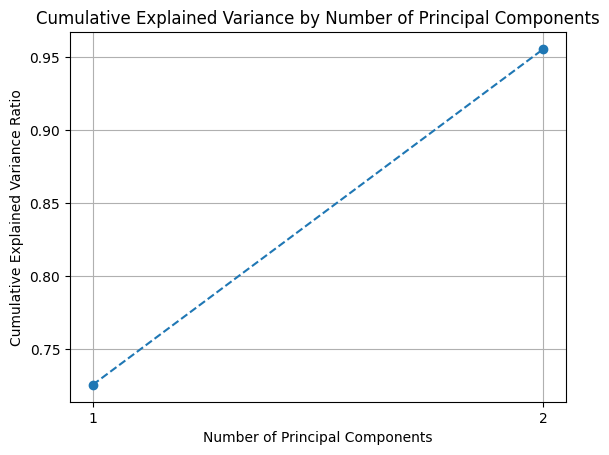

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()

**31). Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy?**

In [ ]:
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test_scaled))
print("Accuracy with uniform weights:", accuracy_uniform)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test_scaled))
print("Accuracy with distance weights:", accuracy_distance)

Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


**32). Train a KNN Regressor and analyze the effect of different K values on performance?**

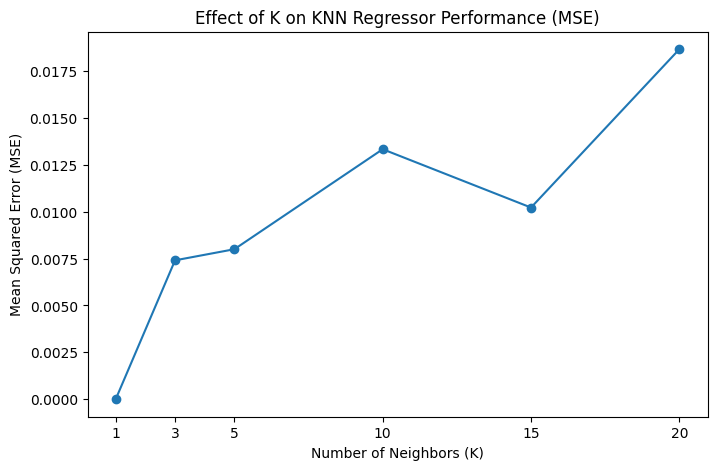

In [ ]:
k_values = [1, 3, 5, 10, 15, 20]
mse_scores = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('Effect of K on KNN Regressor Performance (MSE)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.show()

**33). Implement KNN Imputation for handling missing values in a dataset?**

In [ ]:
data = {'F1': [11, 22, np.nan, 44, 55],
        'F2': [10, np.nan, 30, 40, 50],
        'F3': [100, 200, 300, np.nan, 500]}
df = pd.DataFrame(data)

print("Original DataFrame")
print(df)
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
print("\nKNN imputation:")
print(df_imputed)

Original DataFrame
     F1    F2     F3
0  11.0  10.0  100.0
1  22.0   NaN  200.0
2   NaN  30.0  300.0
3  44.0  40.0    NaN
4  55.0  50.0  500.0

KNN imputation:
     F1    F2     F3
0  11.0  10.0  100.0
1  22.0  25.0  200.0
2  33.0  30.0  300.0
3  44.0  40.0  400.0
4  55.0  50.0  500.0


**34). Train a PCA model and visualize the data projection onto the first two principal components?**

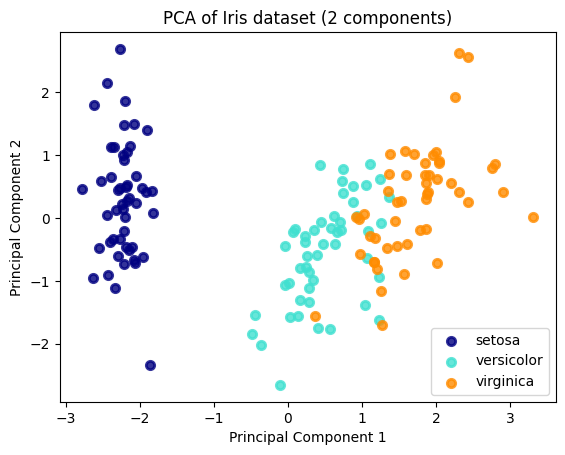

In [ ]:
target_names = iris.target_names
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**35). Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance?**

In [ ]:
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)
print("KD Tree Accuracy:", accuracy_score(y_test, y_pred_kdtree))
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)
print("Ball Tree Accuracy:", accuracy_score(y_test, y_pred_balltree))

KD Tree Accuracy: 1.0
Ball Tree Accuracy: 1.0


**36). Train a PCA model on a high-dimensional dataset and visualize the Scree plot?**

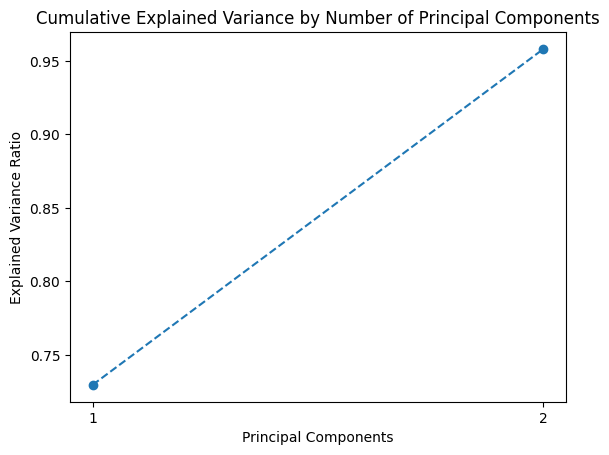

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()

**37). Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score?**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**38). Train a PCA model and analyze the effect of different numbers of components on accuracy?**

In [ ]:
n_components_to_test = [1, 2, 3, 4]
accuracies = []
for n_components in n_components_to_test:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {n_components} components: {accuracy:.4f}")

Accuracy with 1 components: 0.9000
Accuracy with 2 components: 0.9333
Accuracy with 3 components: 1.0000
Accuracy with 4 components: 1.0000


**39). Train a KNN Classifier with different leaf_size values and compare accuracy?**

In [ ]:
leaf_sizes_to_test = [1, 3, 5, 7]

accuracies = []

for leaf_size in leaf_sizes_to_test:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"leaf_size={leaf_size} Accuracy is  {accuracy:.4f}")


leaf_size=1 Accuracy is  1.0000
leaf_size=3 Accuracy is  1.0000
leaf_size=5 Accuracy is  1.0000
leaf_size=7 Accuracy is  1.0000


**40). Train a PCA model and visualize how data points are transformed before and after PCA?**

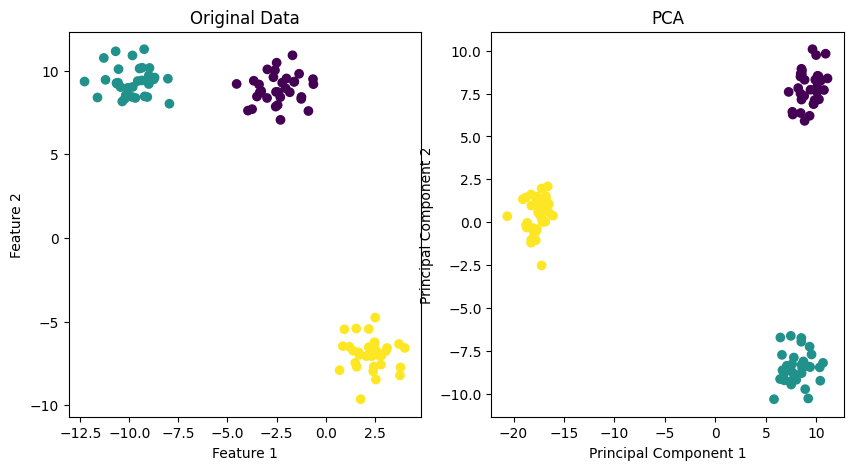

In [ ]:
X, y = make_blobs(n_samples=100, centers=3, n_features=10, random_state=42)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**41). Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report?**

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report for Wine Dataset:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



**42). Train a KNN Regressor and analyze the effect of different distance metrics on prediction error?**

In [ ]:
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
distance_metrics = ['euclidean', 'manhattan']
mse_scores = {}
for metric in distance_metrics:
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse_scores[metric] = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:")
for metric, mse in mse_scores.items():
    print(f"{metric}: {mse:.4f}")

Mean Squared Error:
euclidean: 5988.6146
manhattan: 5143.6682


**43). Train a KNN Classifier and evaluate using ROC-AUC score?**

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)
roc_auc_micro = roc_auc_score(y_test, y_score, multi_class='ovr')
print(f"Micro-average ROC-AUC: {roc_auc_micro:.4f}")

Micro-average ROC-AUC: 1.0000


**44). Train a PCA model and visualize the variance captured by each principal component?**

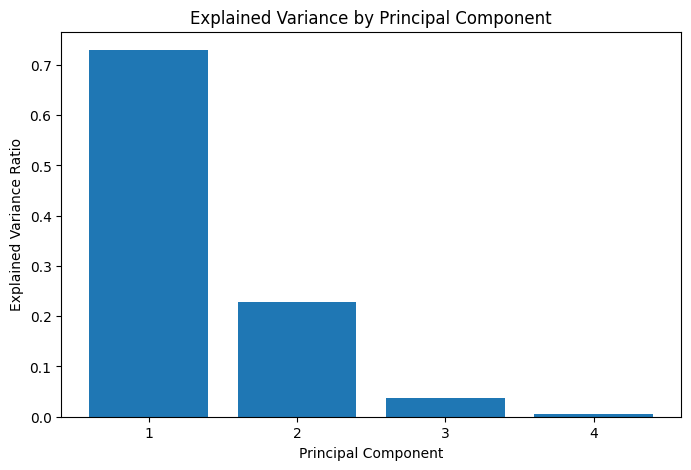

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

**45). Train a KNN Classifier and perform feature selection before training?**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Accuracy 1.0


**46). Train a PCA model and visualize the data reconstruction error after reducing dimensions?**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)
error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction error {error:.4f}")

Reconstruction error 0.0419


**48). Train a PCA model and analyze the effect of different numbers of components on data variance?**

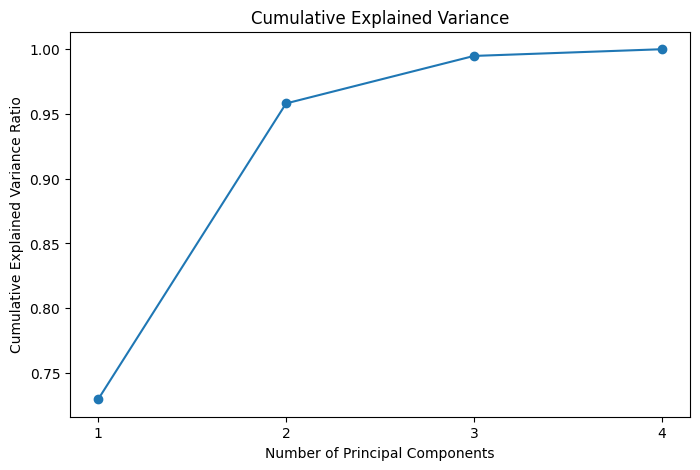

In [ ]:
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()